In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from ast import literal_eval
import string
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(11,8)})

In [3]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/athar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}','-','-',';'])

In [5]:
products = pd.read_json('products.json',orient='records')

In [6]:
products.head(5)

,sku,name,type,price,upc,category,shipping,description,manufacturer,model,url,image
0,43900,Duracell - AAA Batteries (4-Pack),HardGood,5.49,41333424019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AAA...,Duracell,MN2400B4Z,http://www.bestbuy.com/site/duracell-aaa-batte...,http://img.bbystatic.com/BestBuy_US/images/pro...
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),HardGood,5.49,41333415017,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Long-lasting energy; DURALOCK Power Preserve t...,Duracell,MN1500B4Z,http://www.bestbuy.com/site/duracell-aa-1-5v-c...,http://img.bbystatic.com/BestBuy_US/images/pro...
2,127687,Duracell - AA Batteries (8-Pack),HardGood,7.49,41333825014,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AA ...,Duracell,MN1500B8Z,http://www.bestbuy.com/site/duracell-aa-batter...,http://img.bbystatic.com/BestBuy_US/images/pro...
3,150115,Energizer - MAX Batteries AA (4-Pack),HardGood,4.99,39800011329,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,4-pack AA alkaline batteries; battery tester i...,Energizer,E91BP-4,http://www.bestbuy.com/site/energizer-max-batt...,http://img.bbystatic.com/BestBuy_US/images/pro...
4,185230,Duracell - C Batteries (4-Pack),HardGood,8.99,41333440019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; C s...,Duracell,MN1400R4Z,http://www.bestbuy.com/site/duracell-c-batteri...,http://img.bbystatic.com/BestBuy_US/images/pro...


In [7]:
products.columns

Index(['sku', 'name', 'type', 'price', 'upc', 'category', 'shipping',
       'description', 'manufacturer', 'model', 'url', 'image'],
      dtype='object')

In [8]:
columns_to_drop = ['sku','type','price','upc','shipping','manufacturer','model','url','image']

In [9]:
products.drop(columns_to_drop,axis = 1,inplace = True)

In [10]:
products.head()

,name,category,description
0,Duracell - AAA Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AAA...
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Long-lasting energy; DURALOCK Power Preserve t...
2,Duracell - AA Batteries (8-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; AA ...
3,Energizer - MAX Batteries AA (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4-pack AA alkaline batteries; battery tester i...
4,Duracell - C Batteries (4-Pack),"[{'id': 'pcmcat312300050015', 'name': 'Connect...",Compatible with select electronic devices; C s...


In [11]:
products.category[1]

[{'id': 'pcmcat312300050015', 'name': 'Connected Home & Housewares'},
 {'id': 'pcmcat248700050021', 'name': 'Housewares'},
 {'id': 'pcmcat303600050001', 'name': 'Household Batteries'},
 {'id': 'abcat0208002', 'name': 'Alkaline Batteries'}]

In [12]:
categories = products['category'].apply(pd.Series)

In [13]:
categories.head(5)

,0,1,2,3,4,5,6
0,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol...","{'id': 'abcat0208002', 'name': 'Alkaline Batte...",NaN,NaN,NaN
1,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol...","{'id': 'abcat0208002', 'name': 'Alkaline Batte...",NaN,NaN,NaN
2,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol...","{'id': 'abcat0208002', 'name': 'Alkaline Batte...",NaN,NaN,NaN
3,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol...","{'id': 'abcat0208002', 'name': 'Alkaline Batte...",NaN,NaN,NaN
4,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol...","{'id': 'abcat0208002', 'name': 'Alkaline Batte...",NaN,NaN,NaN


In [14]:
def check_values(x):
    """ calculate percentage of  values in dataFrame.
        arguments:
                  x: DataFrame """
    
    total_null_values = x.isna().sum()
    total_values = x.shape[0]
    ratio = total_null_values/total_values
    
    return 1-ratio

In [15]:
check_values(categories)

0    1.000000
1    0.985381
2    0.871374
3    0.506486
4    0.109321
5    0.006699
6    0.000019
dtype: float64

In [16]:
categories = categories.iloc[:,:3].dropna()

In [17]:
categories = categories.rename( columns = lambda x : 'level_' + str(x) )

In [18]:
categories.head(5)

,level_0,level_1,level_2
0,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."
1,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."
2,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."
3,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."
4,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."


In [19]:
df = pd.concat([products,categories],axis = 1)
df.drop('category',axis = 1,inplace = True)
df.head()

,name,description,level_0,level_1,level_2
0,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."
2,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."
3,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."
4,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."


In [20]:
df.isna().sum() 

name              1
description       0
level_0        6643
level_1        6643
level_2        6643
dtype: int64

In [21]:
df.dropna(inplace = True)

In [22]:
df.shape

(45003, 5)

In [23]:
df.head(5)

,name,description,level_0,level_1,level_2
0,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."
2,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."
3,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."
4,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...,"{'id': 'pcmcat312300050015', 'name': 'Connecte...","{'id': 'pcmcat248700050021', 'name': 'Housewar...","{'id': 'pcmcat303600050001', 'name': 'Househol..."


In [24]:
df.iloc[:,2:] = df.iloc[:,2:].applymap(lambda x : x.get('name') )       # getting  values of key name 

In [25]:
df['text'] = df['name'] + ' ' + df['description']                      # joining to have composite text

In [26]:
df

,name,description,level_0,level_1,level_2,text
0,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - AAA Batteries (4-Pack) Compatible w...
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - AA 1.5V CopperTop Batteries (4-Pack...
2,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - AA Batteries (8-Pack) Compatible wi...
3,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,Connected Home & Housewares,Housewares,Household Batteries,Energizer - MAX Batteries AA (4-Pack) 4-pack A...
4,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - C Batteries (4-Pack) Compatible wit...
...,...,...,...,...,...,...
51641,Honeywell - True HEPA Replacement Filters for ...,Compatible with select Honeywell air purifier ...,Appliances,Appliance Parts & Accessories,Air Purifier Filters & Parts,Honeywell - True HEPA Replacement Filters for ...
51642,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,Removes dirt and grime from hard floors; cloth...,Appliances,Appliance Parts & Accessories,Vacuum & Floor Care Accessories,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...
51643,Aleratec - Drive Enclosure - Internal - Black,"1 x Total Bay - 1 x 2.5"" Bay",Computers & Tablets,Computer Accessories & Peripherals,Hard Drives & Storage,Aleratec - Drive Enclosure - Internal - Black ...
51644,Amazon - Fire TV Stick,"Streams 1080p content; dual-band, dual-antenna...",TV & Home Theater,Streaming Media Players,Remote TV Streaming,Amazon - Fire TV Stick Streams 1080p content; ...


In [27]:
cols = ['level_0','level_1','level_2']
df[cols] = df[cols].applymap(str)

In [28]:
type(df['level_0'][0])

str

In [29]:
df['labels'] = df[['level_0','level_1','level_2']].apply(lambda row:[row[0],row[1],row[2]],axis = 1,result_type ='reduce')

In [30]:
df.head(5)

,name,description,level_0,level_1,level_2,text,labels
0,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - AAA Batteries (4-Pack) Compatible w...,"[Connected Home & Housewares, Housewares, Hous..."
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - AA 1.5V CopperTop Batteries (4-Pack...,"[Connected Home & Housewares, Housewares, Hous..."
2,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - AA Batteries (8-Pack) Compatible wi...,"[Connected Home & Housewares, Housewares, Hous..."
3,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,Connected Home & Housewares,Housewares,Household Batteries,Energizer - MAX Batteries AA (4-Pack) 4-pack A...,"[Connected Home & Housewares, Housewares, Hous..."
4,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - C Batteries (4-Pack) Compatible wit...,"[Connected Home & Housewares, Housewares, Hous..."


In [31]:
from collections import Counter

def clean_text(text):
    stopwords_dict = Counter(stop_words)
    text = ' '.join([word for word in text.split() if word not in stopwords_dict and word not in string.punctuation])
    return text
    
df['description'] = df['description'].apply(clean_text)

In [32]:
document_length = df['text'].apply(lambda words: len(words.split(" ")))
max_seq_len = np.round(document_length.mean() + document_length.std()).astype(int) ## vector space size would be equal to this in text vectorizaion

In [33]:
max_seq_len

39

In [34]:
document_length.describe()

count    45003.000000
mean        29.887852
std          9.174671
min          4.000000
25%         23.000000
50%         30.000000
75%         36.000000
max        101.000000
Name: text, dtype: float64

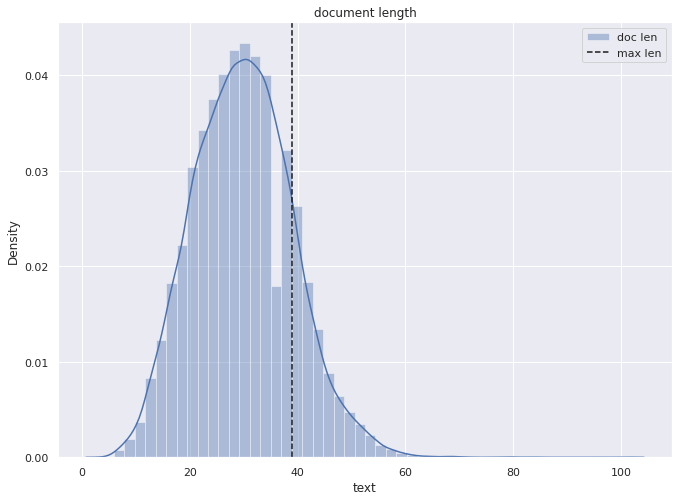

In [35]:
sns.distplot(document_length, hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('document length')
plt.legend()
plt.show()

In [36]:
def products_stats(level):
    """calculate products counts
    
    :level: dataframe column of particular level"""
    
    stats = pd.DataFrame(df.groupby(level).size())
    stats.reset_index(inplace = True)
    stats.rename(columns = {stats.columns[0] : "products",stats.columns[1] : "counts"},inplace=True)
    stats.sort_values('counts',ascending = False)
    
    return stats 

In [37]:
L_0 = products_stats('level_0').sort_values('counts',ascending=False)
L_1 = products_stats('level_1').sort_values('counts',ascending=False)
L_2 = products_stats('level_2').sort_values('counts',ascending=False)

In [38]:
def plot(df,title):
    """ barplot for products vs their count"""
    
    sns.barplot(x = df.iloc[:,1],y = df.iloc[:,0])
    plt.title(f"Products counts at {title} ")
    plt.show()

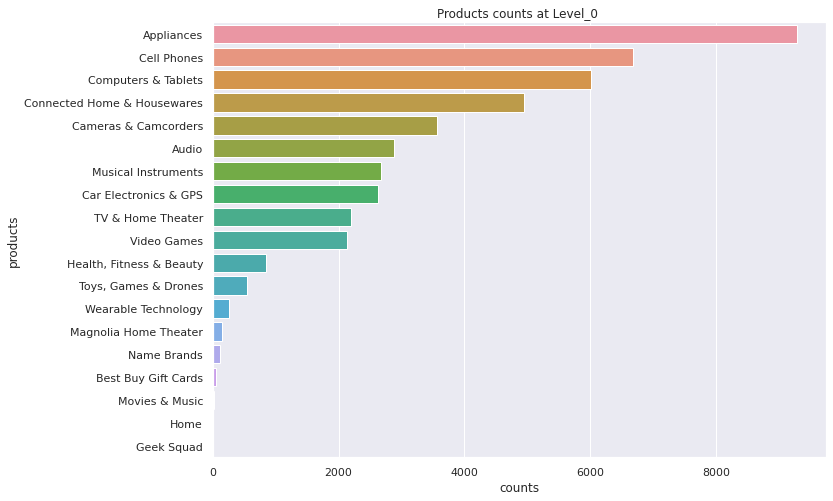

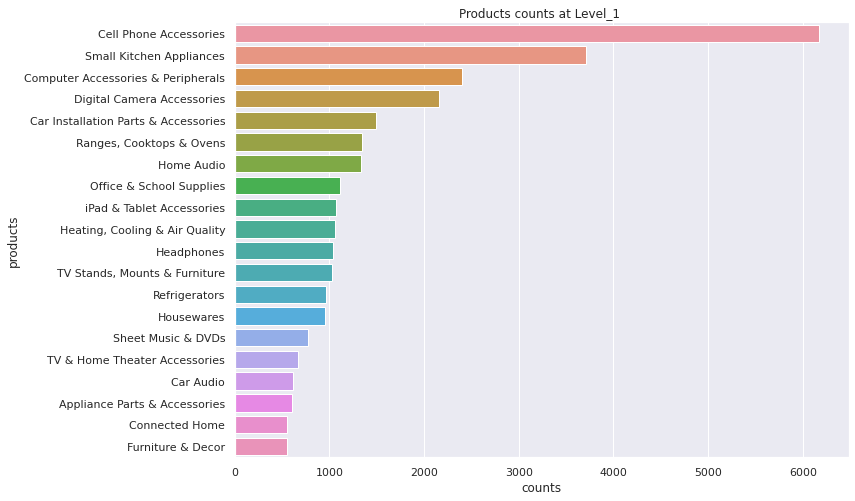

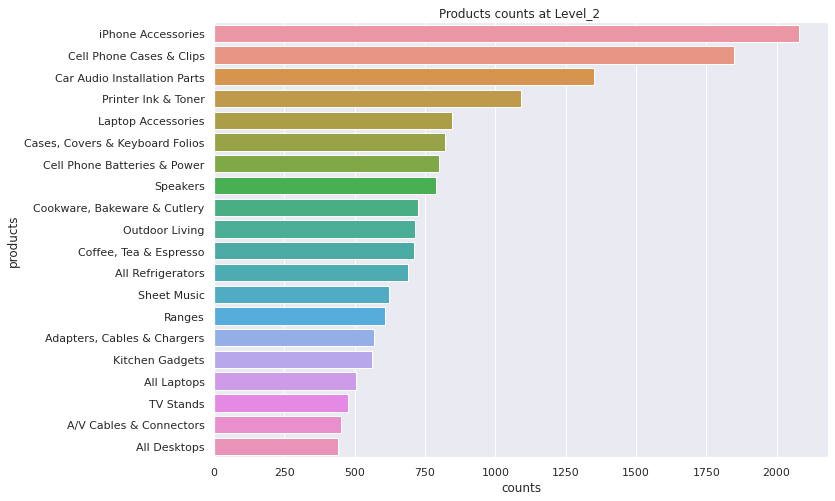

In [39]:
plot(L_0.head(20),"Level_0")
plot(L_1.head(20),"Level_1")
plot(L_2.head(20),"Level_2")

In [40]:
df.head(2)

,name,description,level_0,level_1,level_2,text,labels
0,Duracell - AAA Batteries (4-Pack),Compatible select electronic devices; AAA size...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - AAA Batteries (4-Pack) Compatible w...,"[Connected Home & Housewares, Housewares, Hous..."
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - AA 1.5V CopperTop Batteries (4-Pack...,"[Connected Home & Housewares, Housewares, Hous..."


In [41]:
def words_frequency(level):
    
    product_groups = df.groupby(level)
    group_keys = product_groups.groups.keys()
    for gps in group_keys:
        words_dict = product_groups.get_group(gps).description.apply(lambda x : pd.value_counts(x.split(" "))).sum(axis = 0)
        data= pd.DataFrame({
               'words' : words_dict.keys(),
               'counts' : words_dict.values
                }).sort_values('counts',ascending=False)
        
        yield plot(data.head(20),gps)

In [42]:
level_0_generator=words_frequency('level_0')

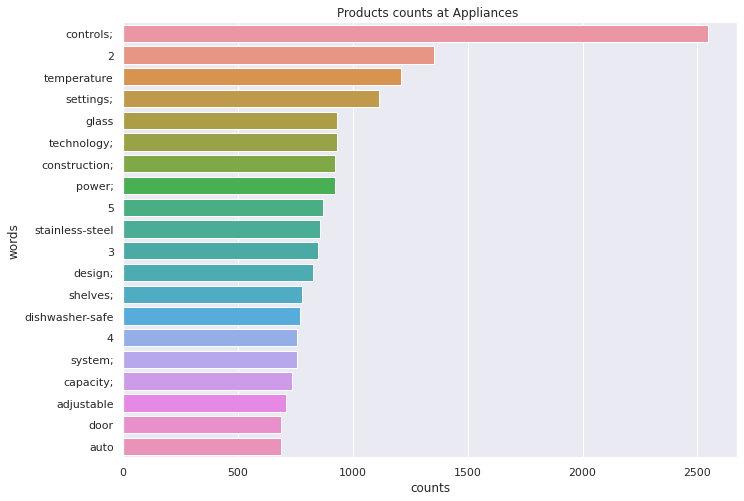

In [43]:
next(level_0_generator)

In [44]:
level_1_generator=words_frequency('level_1')

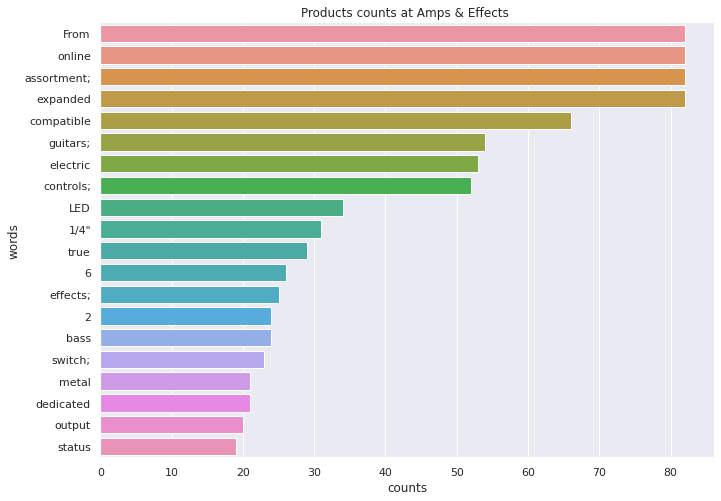

In [72]:
next(level_1_generator)

In [46]:
df

,name,description,level_0,level_1,level_2,text,labels
0,Duracell - AAA Batteries (4-Pack),Compatible select electronic devices; AAA size...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - AAA Batteries (4-Pack) Compatible w...,"[Connected Home & Housewares, Housewares, Hous..."
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - AA 1.5V CopperTop Batteries (4-Pack...,"[Connected Home & Housewares, Housewares, Hous..."
2,Duracell - AA Batteries (8-Pack),Compatible select electronic devices; AA size;...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - AA Batteries (8-Pack) Compatible wi...,"[Connected Home & Housewares, Housewares, Hous..."
3,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,Connected Home & Housewares,Housewares,Household Batteries,Energizer - MAX Batteries AA (4-Pack) 4-pack A...,"[Connected Home & Housewares, Housewares, Hous..."
4,Duracell - C Batteries (4-Pack),Compatible select electronic devices; C size; ...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - C Batteries (4-Pack) Compatible wit...,"[Connected Home & Housewares, Housewares, Hous..."
...,...,...,...,...,...,...,...
51641,Honeywell - True HEPA Replacement Filters for ...,Compatible select Honeywell air purifier model...,Appliances,Appliance Parts & Accessories,Air Purifier Filters & Parts,Honeywell - True HEPA Replacement Filters for ...,"[Appliances, Appliance Parts & Accessories, Ai..."
51642,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,Removes dirt grime hard floors; cloth material...,Appliances,Appliance Parts & Accessories,Vacuum & Floor Care Accessories,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,"[Appliances, Appliance Parts & Accessories, Va..."
51643,Aleratec - Drive Enclosure - Internal - Black,"1 x Total Bay 1 x 2.5"" Bay",Computers & Tablets,Computer Accessories & Peripherals,Hard Drives & Storage,Aleratec - Drive Enclosure - Internal - Black ...,"[Computers & Tablets, Computer Accessories & P..."
51644,Amazon - Fire TV Stick,"Streams 1080p content; dual-band, dual-antenna...",TV & Home Theater,Streaming Media Players,Remote TV Streaming,Amazon - Fire TV Stick Streams 1080p content; ...,"[TV & Home Theater, Streaming Media Players, R..."


In [47]:
any(x in df.level_0 for x in df.level_1.unique())

False

In [48]:
any(x in df.level_0 for x in df.level_2.unique())

False

In [49]:
any(x in df.level_1 for x in df.level_2.unique())

False

In [50]:
df['labels'].value_counts()

[Cell Phones, Cell Phone Accessories, iPhone Accessories]                                      2079
[Cell Phones, Cell Phone Accessories, Cell Phone Cases & Clips]                                1847
[Car Electronics & GPS, Car Installation Parts & Accessories, Car Audio Installation Parts]    1351
[Connected Home & Housewares, Office & School Supplies, Printer Ink & Toner]                   1091
[Computers & Tablets, Computer Accessories & Peripherals, Laptop Accessories]                   845
                                                                                               ... 
[Toys, Games & Drones, Kids' Electronics, Kids' Cameras]                                          1
[Cameras & Camcorders, Memory Cards, Memory Card Cases]                                           1
[Health, Fitness & Beauty, Strength & Weight Training, Resistance Bands]                          1
[Name Brands, Sony, Sony Cameras & Camcorders]                                                    1


In [51]:
df

,name,description,level_0,level_1,level_2,text,labels
0,Duracell - AAA Batteries (4-Pack),Compatible select electronic devices; AAA size...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - AAA Batteries (4-Pack) Compatible w...,"[Connected Home & Housewares, Housewares, Hous..."
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - AA 1.5V CopperTop Batteries (4-Pack...,"[Connected Home & Housewares, Housewares, Hous..."
2,Duracell - AA Batteries (8-Pack),Compatible select electronic devices; AA size;...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - AA Batteries (8-Pack) Compatible wi...,"[Connected Home & Housewares, Housewares, Hous..."
3,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,Connected Home & Housewares,Housewares,Household Batteries,Energizer - MAX Batteries AA (4-Pack) 4-pack A...,"[Connected Home & Housewares, Housewares, Hous..."
4,Duracell - C Batteries (4-Pack),Compatible select electronic devices; C size; ...,Connected Home & Housewares,Housewares,Household Batteries,Duracell - C Batteries (4-Pack) Compatible wit...,"[Connected Home & Housewares, Housewares, Hous..."
...,...,...,...,...,...,...,...
51641,Honeywell - True HEPA Replacement Filters for ...,Compatible select Honeywell air purifier model...,Appliances,Appliance Parts & Accessories,Air Purifier Filters & Parts,Honeywell - True HEPA Replacement Filters for ...,"[Appliances, Appliance Parts & Accessories, Ai..."
51642,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,Removes dirt grime hard floors; cloth material...,Appliances,Appliance Parts & Accessories,Vacuum & Floor Care Accessories,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,"[Appliances, Appliance Parts & Accessories, Va..."
51643,Aleratec - Drive Enclosure - Internal - Black,"1 x Total Bay 1 x 2.5"" Bay",Computers & Tablets,Computer Accessories & Peripherals,Hard Drives & Storage,Aleratec - Drive Enclosure - Internal - Black ...,"[Computers & Tablets, Computer Accessories & P..."
51644,Amazon - Fire TV Stick,"Streams 1080p content; dual-band, dual-antenna...",TV & Home Theater,Streaming Media Players,Remote TV Streaming,Amazon - Fire TV Stick Streams 1080p content; ...,"[TV & Home Theater, Streaming Media Players, R..."


In [52]:
dataset=df.loc[:,['text','labels']]

In [53]:
dataset.head()

,text,labels
0,Duracell - AAA Batteries (4-Pack) Compatible w...,"[Connected Home & Housewares, Housewares, Hous..."
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack...,"[Connected Home & Housewares, Housewares, Hous..."
2,Duracell - AA Batteries (8-Pack) Compatible wi...,"[Connected Home & Housewares, Housewares, Hous..."
3,Energizer - MAX Batteries AA (4-Pack) 4-pack A...,"[Connected Home & Housewares, Housewares, Hous..."
4,Duracell - C Batteries (4-Pack) Compatible wit...,"[Connected Home & Housewares, Housewares, Hous..."


In [54]:
dataset.to_csv('./datasets/data.csv',index=False)

In [55]:
df = pd.read_csv('./datasets/data.csv')

In [56]:
df['labels'].value_counts()

['Cell Phones', 'Cell Phone Accessories', 'iPhone Accessories']                                      2079
['Cell Phones', 'Cell Phone Accessories', 'Cell Phone Cases & Clips']                                1847
['Car Electronics & GPS', 'Car Installation Parts & Accessories', 'Car Audio Installation Parts']    1351
['Connected Home & Housewares', 'Office & School Supplies', 'Printer Ink & Toner']                   1091
['Computers & Tablets', 'Computer Accessories & Peripherals', 'Laptop Accessories']                   845
                                                                                                     ... 
['Toys, Games & Drones', "Kids' Electronics", "Kids' Cameras"]                                          1
['Cameras & Camcorders', 'Memory Cards', 'Memory Card Cases']                                           1
['Health, Fitness & Beauty', 'Strength & Weight Training', 'Resistance Bands']                          1
['Name Brands', 'Sony', 'Sony Cameras & Camcor

In [57]:
sum(df["labels"].value_counts() == 1)

62

In [58]:
df=df.groupby("labels").filter(lambda x: len(x) > 1)
df.shape

(44941, 2)

In [59]:
df["labels"] = df["labels"].apply(
    lambda x: literal_eval(x)
)
df['labels'].values[:5]

array([list(['Connected Home & Housewares', 'Housewares', 'Household Batteries']),
       list(['Connected Home & Housewares', 'Housewares', 'Household Batteries']),
       list(['Connected Home & Housewares', 'Housewares', 'Household Batteries']),
       list(['Connected Home & Housewares', 'Housewares', 'Household Batteries']),
       list(['Connected Home & Housewares', 'Housewares', 'Household Batteries'])],
      dtype=object)

In [60]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [61]:
test_split = 0.2
seed = np.random.seed(500)
train, test = train_test_split(df,test_size=test_split,stratify=df["labels"].values,random_state=seed)
val = train.sample(frac=0.2)
train.drop(val.index, inplace=True)

print(f"Number of rows in training set: {len(train)}")
print(f"Number of rows in validation set: {len(val)}")
print(f"Number of rows in test set: {len(test)}")

Number of rows in training set: 28762
Number of rows in validation set: 7190
Number of rows in test set: 8989


In [62]:
terms = tf.ragged.constant(train["labels"].values)
lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
lookup.adapt(terms)

vocab = lookup.get_vocabulary()

2022-04-08 18:24:15.126016: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [63]:
len(vocab)

706

In [64]:
def get_encoded_datset(df):
    """encode variable length lables to one-hot encoding"""
    
    labels = tf.ragged.constant(df["labels"].values)
    label_binarized = lookup(labels).numpy()
    df = pd.DataFrame( ( df["text"].values, label_binarized ) ).T
    df = df.rename(columns={df.columns[0]:'text',df.columns[1]:'labels'})
#     df.labels=df.labels.apply(lambda x: np.array(x))
    return df

In [65]:
train=get_encoded_datset(train)
val=get_encoded_datset(val)
test=get_encoded_datset(test)

In [66]:
train.labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [67]:
train.to_pickle('./datasets/train.pkl')
val.to_pickle('./datasets/val.pkl')
test.to_pickle('./datasets/test.pkl')

In [68]:
import json

In [69]:
data={
    'vocab':vocab
}



In [70]:
with open('./datasets/vocab_data.json', 'w') as file:
    json.dump(data, file)

In [71]:
()

()